In [49]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [17]:
stock_Y = pd.read_csv('pt2-dependent.csv').iloc[:, [0, 3, 4]]
stock_X = pd.read_csv('pt2-explainatory.csv').iloc[:, :-2]

In [64]:
new_column_names = ['datetime', 'SxP', 'Gold', 'VIX', 'DX', 'IRX', 'TYX']  

for column in stock_X.columns:
    stock_X = stock_X.rename(columns={column: new_column_names.pop(0)})

stock_Y = stock_Y.rename(columns={"TSLA return": "TSLA_return"})

df = pd.merge(stock_X, stock_Y, on='datetime')
df['datetime'] = pd.to_datetime(df['datetime'])
df.drop('datetime', axis=1, inplace=True)
#df.drop('TSLA price', axis=1, inplace=True)
df.dropna(inplace=True)

In [65]:
df

,SxP,Gold,VIX,DX,IRX,TYX,TSLA price,TSLA_return
1,1859.449951,1321.400024,14.000000,79.779999,0.043,3.592,16.320667,0.299723
2,1872.339966,1283.400024,13.880000,80.099998,0.028,3.561,13.896667,-0.160783
3,1883.949951,1295.599976,13.410000,79.489998,0.020,3.458,13.859333,-0.002690
4,1923.569946,1245.599976,11.400000,80.370003,0.030,3.314,13.851333,-0.000577
6,1930.670044,1281.300049,16.950001,81.459999,0.018,3.311,14.886667,-0.072373
...,...,...,...,...,...,...,...,...
107,3839.500000,1819.699951,21.670000,103.519997,4.260,3.975,123.180000,-0.457813
109,3970.149902,1828.900024,20.700001,104.870003,4.710,3.931,205.710007,0.171905
110,4109.310059,1969.000000,18.700001,102.510002,4.585,3.689,207.460007,0.008471
111,4169.479980,1990.099976,15.780000,101.669998,4.923,3.678,164.309998,-0.233184


In [83]:
new_df = df.copy()
new_df["SxP"] = new_df["SxP"].apply(lambda x: np.log(x)) / new_df["DX"]
#new_df["DX"] = new_df["DX"].apply(lambda x: np.log(x))
new_df["VIX"] = new_df["VIX"].apply(lambda x: np.sqrt(x)) - new_df["TYX"]


new_df.drop('Gold', axis=1, inplace=True)

/Users/danielbai/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


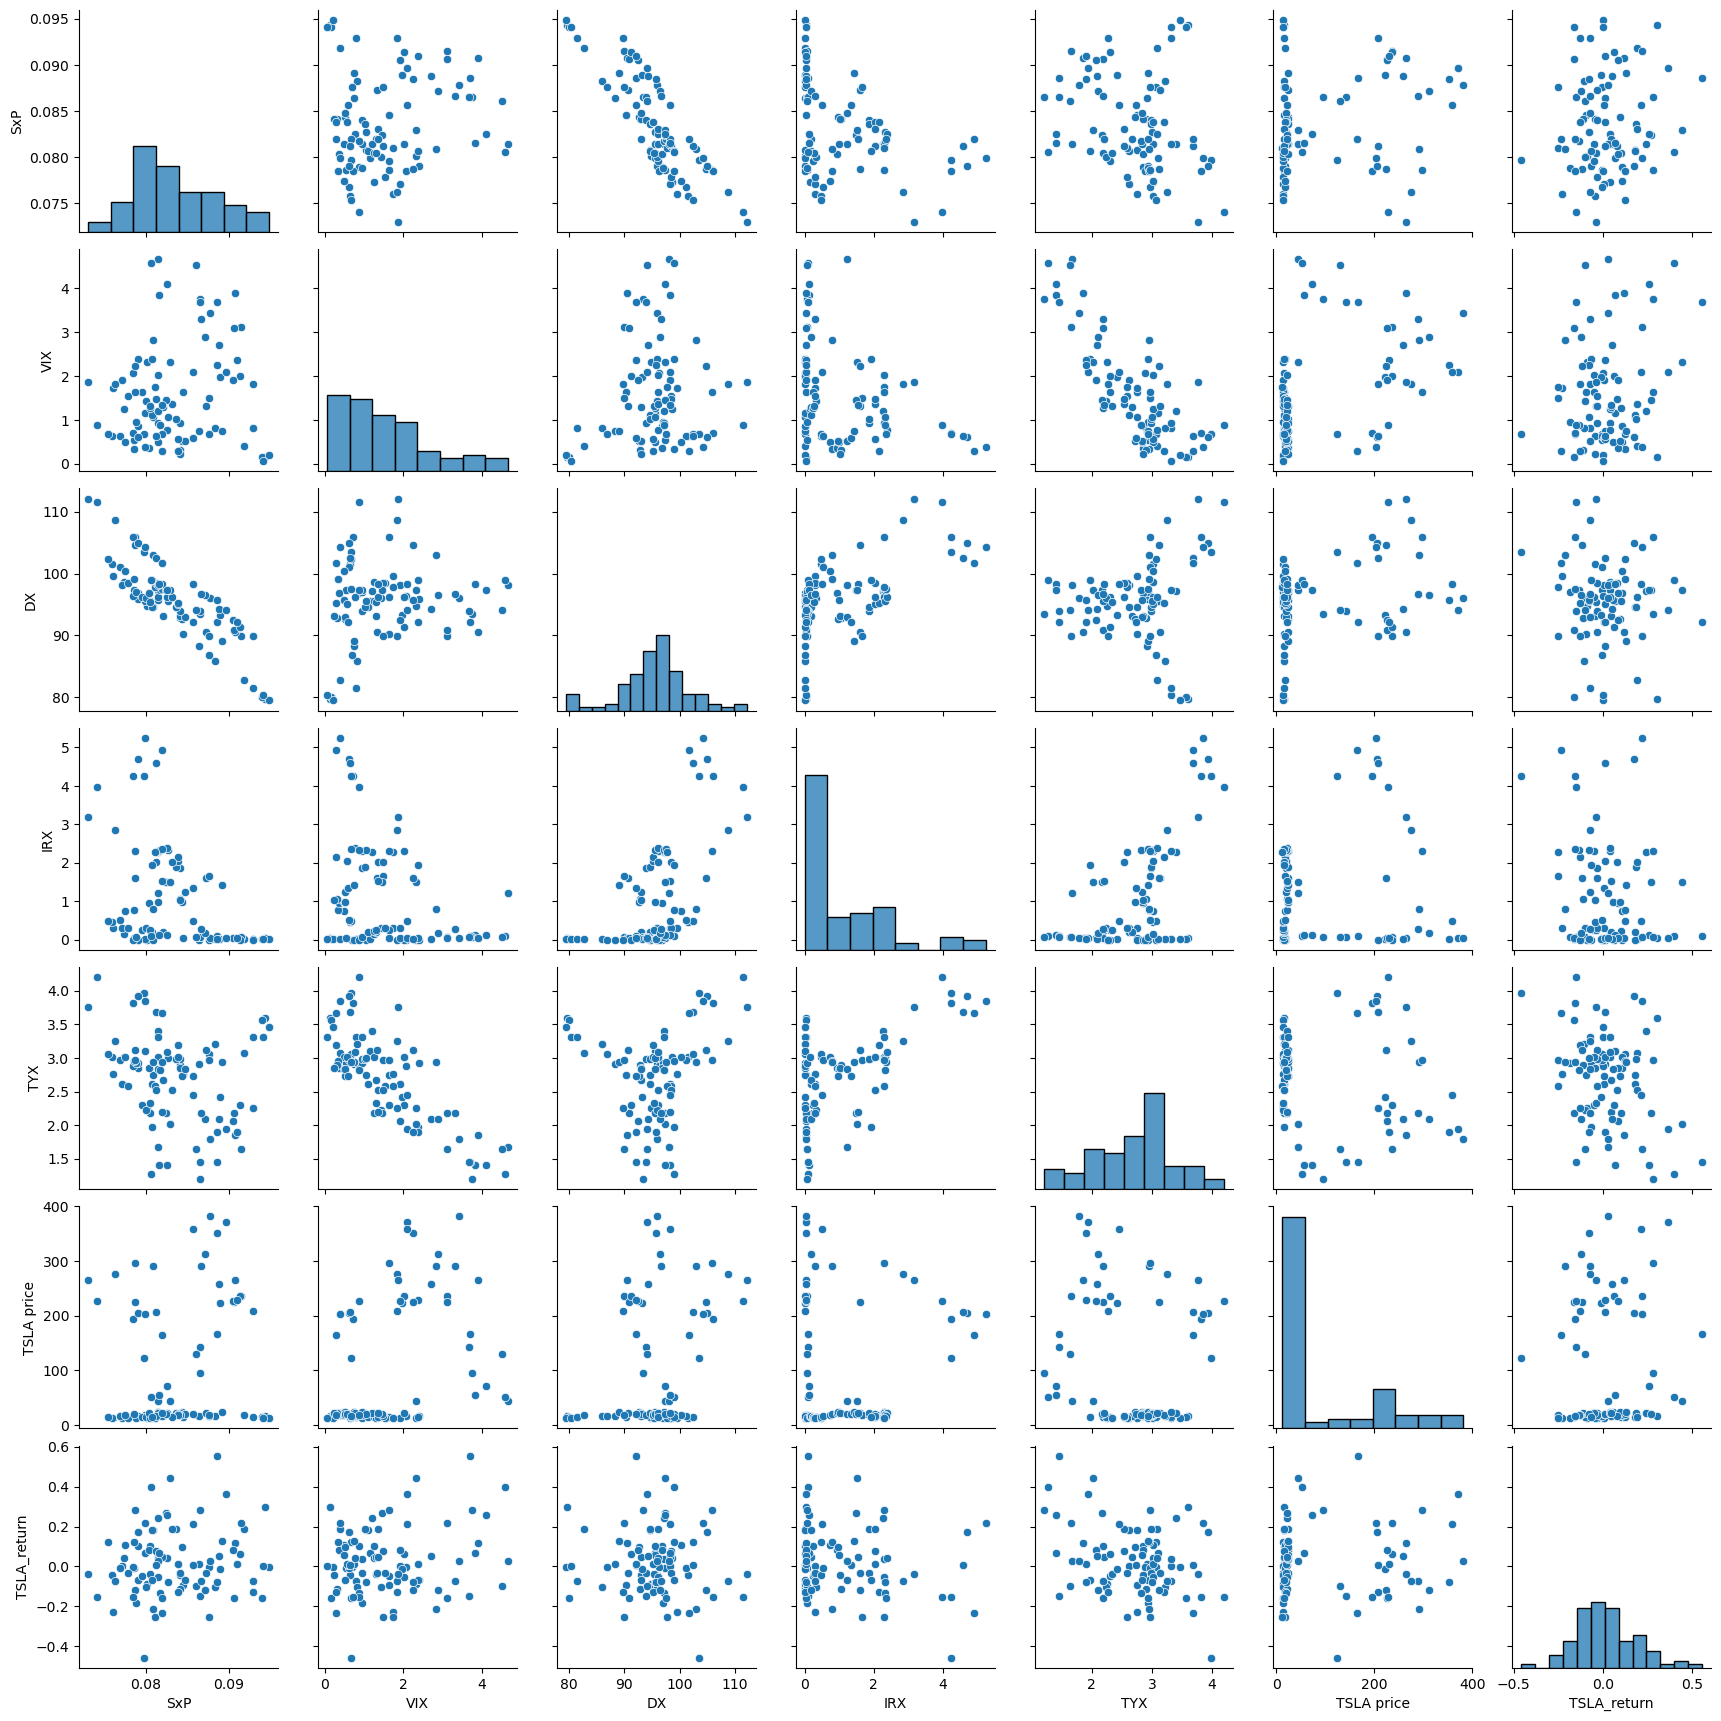

In [84]:
sns.pairplot(new_df)

In [88]:
X = new_df.loc[:, new_df.columns.isin(["SxP", "VIX"])]
Y = new_df.loc[:, new_df.columns.isin(["TSLA_return"])]

In [89]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [90]:
ols_formula = 'TSLA_return ~ ' + ' + '.join(X.columns)

In [91]:
from statsmodels.formula.api import ols

In [92]:
ols_model = ols(ols_formula, data=pd.concat([X_train, Y_train], axis=1)).fit()

In [93]:
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            TSLA_return   R-squared:                       0.079
Model:                            OLS   Adj. R-squared:                  0.050
Method:                 Least Squares   F-statistic:                     2.727
Date:                Sun, 25 Feb 2024   Prob (F-statistic):             0.0730
Time:                        14:37:55   Log-Likelihood:                 24.792
No. Observations:                  67   AIC:                            -43.58
Df Residuals:                      64   BIC:                            -36.97
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2645      0.353     -0.750      0.456      -0.969       0.440
SxP            2.7473      4.245      0.647      0.520      -5.733      11.227
VIX            0.0416      0.019      2.183      0.033       0.004       0.080
==============================================================================
Omnibus:                        0.584   Durbin-Watson:                   2.512
Prob(Omnibus):                  0.747   Jarque-Bera (JB):                0.388
Skew:                           0.186   Prob(JB):                        0.824
Kurtosis:                       2.991   Cond. No.                         418.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""